In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __init__ import *
import numpy as np
from export.saver import read_pickle, save_pickle
from read.svg_reader import SVGReader
from helpers.helpers import filter_none
from placement2.attract import *
from visuals.plotter import plot_general
from copy import deepcopy
import networkx as nx
from itertools import pairwise, accumulate, product
from functools import reduce
from operator import add
from helpers.helpers import sort_and_group_objects

In [3]:
case  = "amber_a_f01.svg"
sv = SVGReader(case)
sv.run()
# ag = AdjacencyGenerator(sv.layout, buffer_size=0.17)
# ag.run() # TODO shouldnt run if sv.layout is empty
# ag.draw_graph()
domains = sv.layout.domains
pos = create_pos(domains)


In [4]:
plot_general(sv.layout.domains)


In [5]:
plot_general(adjust_domains_x(domains))

In [106]:
G  = create_graph(domains)
G

In [107]:
sizes = get_distances(G)
sizes

[('bedroom_1', 'transit_space', Decimal('0.14')),
 ('bedroom_1', 'laundry', Decimal('0.16')),
 ('bedroom_1', 'dining', Decimal('0.40')),
 ('bedroom_1', 'm_bath', Decimal('0.48')),
 ('bedroom_1', 'm_bedroom', Decimal('0.46')),
 ('bedroom_1', 'bath', Decimal('0.28')),
 ('bedroom_1', 'closet', Decimal('0.55')),
 ('bedroom_1', 'm_closet', Decimal('0.55')),
 ('bedroom_2', 'transit_space', Decimal('0.14')),
 ('bedroom_2', 'kitchen', Decimal('0.14')),
 ('bedroom_2', 'dining', Decimal('0.40')),
 ('bedroom_2', 'm_bedroom', Decimal('0.46')),
 ('bedroom_2', 'bath', Decimal('0.28')),
 ('bedroom_2', 'closet', Decimal('0.55')),
 ('bedroom_2', 'm_closet', Decimal('0.55'))]

In [113]:
groups = sort_and_group_objects(sizes, lambda x: x[1])
groups

[[('bedroom_1', 'bath', Decimal('0.28')),
  ('bedroom_2', 'bath', Decimal('0.28'))],
 [('bedroom_1', 'closet', Decimal('0.55')),
  ('bedroom_2', 'closet', Decimal('0.55'))],
 [('bedroom_1', 'dining', Decimal('0.40')),
  ('bedroom_2', 'dining', Decimal('0.40'))],
 [('bedroom_2', 'kitchen', Decimal('0.14'))],
 [('bedroom_1', 'laundry', Decimal('0.16'))],
 [('bedroom_1', 'm_bath', Decimal('0.48'))],
 [('bedroom_1', 'm_bedroom', Decimal('0.46')),
  ('bedroom_2', 'm_bedroom', Decimal('0.46'))],
 [('bedroom_1', 'm_closet', Decimal('0.55')),
  ('bedroom_2', 'm_closet', Decimal('0.55'))],
 [('bedroom_1', 'transit_space', Decimal('0.14')),
  ('bedroom_2', 'transit_space', Decimal('0.14'))]]

In [115]:
from decimal import Decimal


def handle_group(group:list[tuple[str, str, Decimal]]):
    val = min([i[-1] for i in group])
    root, node, _ = group[0]
    return (root, node, val)


In [118]:
final_groups = [handle_group(i) for i in groups]
final_groups

[('bedroom_1', 'bath', Decimal('0.28')),
 ('bedroom_1', 'closet', Decimal('0.55')),
 ('bedroom_1', 'dining', Decimal('0.40')),
 ('bedroom_2', 'kitchen', Decimal('0.14')),
 ('bedroom_1', 'laundry', Decimal('0.16')),
 ('bedroom_1', 'm_bath', Decimal('0.48')),
 ('bedroom_1', 'm_bedroom', Decimal('0.46')),
 ('bedroom_1', 'm_closet', Decimal('0.55')),
 ('bedroom_1', 'transit_space', Decimal('0.14'))]

In [121]:
new_domains = deepcopy(domains)
for g in final_groups:
    root, node, val = g
    new_domains[node] = domains[node].modify(lambda x: x-val, "x")

new_domains

{'bedroom_1': Domain(bedroom_1, x=[0.00-3.22], y=[3.29-6.09]),
 'kitchen': Domain(kitchen, x=[3.22-5.02], y=[0.00-2.24]),
 'm_bath': Domain(m_bath, x=[4.82-7.14], y=[4.79-6.09]),
 'm_bedroom': Domain(m_bedroom, x=[7.34-9.47], y=[3.35-6.09]),
 'm_closet': Domain(m_closet, x=[8.38-9.38], y=[2.69-3.29]),
 'bath': Domain(bath, x=[5.02-7.34], y=[3.35-4.58]),
 'dining': Domain(dining, x=[5.02-8.38], y=[0.00-3.15]),
 'transit_space': Domain(transit_space, x=[3.22-5.02], y=[2.41-4.19]),
 'closet': Domain(closet, x=[8.38-9.38], y=[-0.05-2.36]),
 'bedroom_2': Domain(bedroom_2, x=[0.00-3.22], y=[0.00-3.15]),
 'laundry': Domain(laundry, x=[3.22-4.82], y=[4.31-6.06])}

In [122]:
plot_general(new_domains)

{('bedroom_1',
  'transit_space'): Text(1.6800087192468345, 2.849997716387734, '0.14'),
 ('bedroom_1', 'laundry'): Text(1.6900210265931679, 3.800006345303262, '0.16'),
 ('transit_space',
  'bath'): Text(4.329970780080185, 2.8799858418945226, '0.14'),
 ('transit_space',
  'dining'): Text(4.390011384284589, 1.2049866814923007, '0.26'),
 ('laundry', 'bath'): Text(4.340033589303493, 3.8299832053482517, '0.32'),
 ('laundry', 'm_bath'): Text(4.340027218163012, 4.550006804540754, '0.32'),
 ('bedroom_2',
  'transit_space'): Text(1.680014050696045, 1.2050100780290085, '0.14'),
 ('bedroom_2', 'kitchen'): Text(1.6799918447993698, 0.0, '0.14'),
 ('kitchen', 'dining'): Text(4.38998730991967, 0.0, '0.26'),
 ('bath', 'm_bedroom'): Text(6.550040129525588, 3.3500000000000005, '0.18'),
 ('m_bath', 'm_bedroom'): Text(6.549993129458745, 4.070003957431763, '0.18'),
 ('dining', 'closet'): Text(7.174963469979122, -0.024999479629332244, '0.15'),
 ('dining', 'm_closet'): Text(7.174976709195182, 1.3449821503518

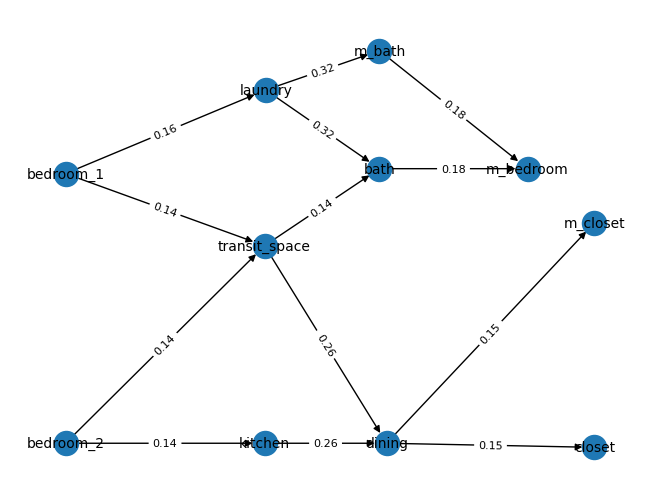

In [33]:
nx.draw(G, pos=pos)
nx.draw_networkx_labels(G,pos, labels={n: n for n in G},font_size=10)
edge_labels = nx.get_edge_attributes(G, 'size')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)